# Process Model for Machine Learning in Digital Health

<img src="assets/process_model.png" width="40%"/>

## 1. Requirements Analysis

- De-identified data
- Interpretable models

TODO

## 2. Data Acquisition

We will use the **South African Heart Disease Dataset**, which was introduced in the [previous notebook](./1_ML_Intro.ipynb).

The dataset is already de-identified

In [1]:
from utils import load_messy_heart_disease_dataset
heart_disease_data = load_messy_heart_disease_dataset()
heart_disease_data.head(5)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


## 3. Data Preparation

### Labeling

In [2]:
# Use more user-friendly column names
columns = [
    'Patient ID',
    'Systolic Blood Pressure', 
    'Tobacco (kg)', 
    'LDL', 
    'Adiposity', 
    'Fam. Hist', 
    'Type A', 
    'Obesity', 
    'Alcohol', 
    'Age',
    'Coronary Heart Disease'
]

heart_disease_data.columns = columns
heart_disease_data.head(5)

,Patient ID,Systolic Blood Pressure,Tobacco (kg),LDL,Adiposity,Fam. Hist,Type A,Obesity,Alcohol,Age,Coronary Heart Disease
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [3]:
target = 'Coronary Heart Disease'
features = [c for c in columns if c != target and c != 'Patient ID']

### Exploration & Quality Assessment

In [4]:
heart_disease_data.describe()

,Patient ID,Systolic Blood Pressure,Tobacco (kg),LDL,Adiposity,Type A,Obesity,Alcohol,Age,Coronary Heart Disease
count,462.00,462.00,462.00,462.00,462.00,462.00,462.00,462.00,462.00,462.00
mean,231.94,138.33,3.64,4.74,25.41,53.10,26.04,17.04,67.24,0.35
std,133.94,20.50,4.59,2.07,7.78,9.82,4.21,24.48,524.63,0.48
min,1.00,101.00,0.00,0.98,6.74,13.00,14.70,0.00,15.00,0.00
25%,116.25,124.00,0.05,3.28,19.77,47.00,22.98,0.51,31.25,0.00
50%,231.50,134.00,2.00,4.34,26.12,53.00,25.80,7.51,45.00,0.00
75%,347.75,148.00,5.50,5.79,31.23,60.00,28.50,23.89,55.00,1.00
max,463.00,218.00,31.20,15.33,42.49,78.00,46.58,147.19,"11,315.00",1.00


<Axes: ylabel='Frequency'>

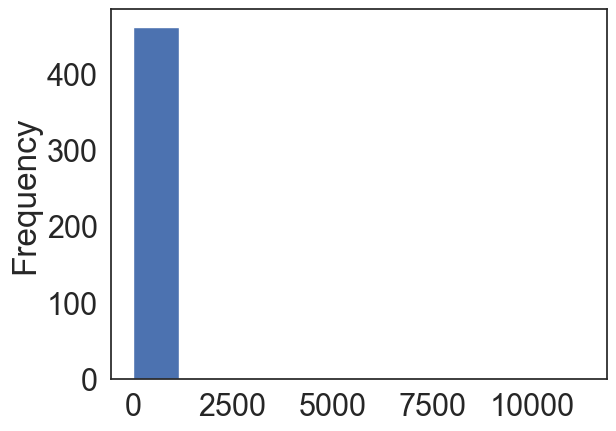

In [5]:
heart_disease_data.Age.plot.hist()

In [6]:
heart_disease_data[heart_disease_data.Age > 10000]

,Patient ID,Systolic Blood Pressure,Tobacco (kg),LDL,Adiposity,Fam. Hist,Type A,Obesity,Alcohol,Age,Coronary Heart Disease
103,104,128,0.42,4.60,26.68,Absent,41,30.97,10.33,11315,0


In [7]:
heart_disease_data_clean = heart_disease_data[~(heart_disease_data.Age > 10000)]

<Axes: ylabel='Frequency'>

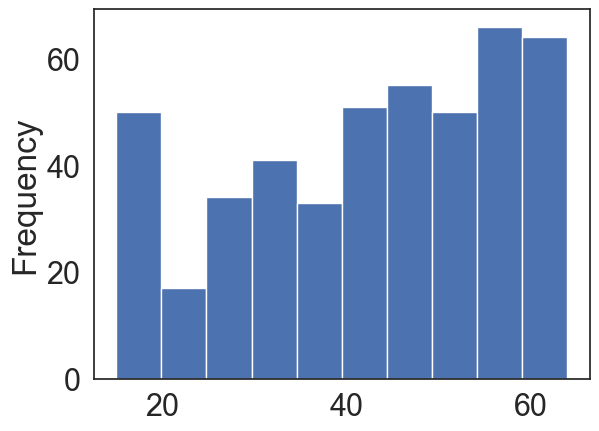

In [8]:
heart_disease_data_clean.Age.plot.hist()

### Training / Test Set

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = heart_disease_data_clean[features]
y = heart_disease_data_clean[target]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [12]:
# Same distribution?
y_train.mean(), y_test.mean()

(0.358695652173913, 0.3010752688172043)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# Same distribution?
y_train.mean(), y_test.mean()

(0.34782608695652173, 0.34408602150537637)

### Feature Engineering

In [15]:
for ds in [X_train, X_test]:
    ds['Fam. Hist'] = ds['Fam. Hist'].apply(lambda x: 1 if x == 'Present' else 0)

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
poly = PolynomialFeatures()

In [18]:
X_poly = poly.fit_transform(X_train)

In [19]:
X_poly_names = poly.get_feature_names_out(X_train.columns)

In [20]:
import pandas as pd
pd.DataFrame(X_poly, columns=X_poly_names)

,1,Systolic Blood Pressure,Tobacco (kg),LDL,Adiposity,Fam. Hist,Type A,Obesity,Alcohol,Age,...,Type A^2,Type A Obesity,Type A Alcohol,Type A Age,Obesity^2,Obesity Alcohol,Obesity Age,Alcohol^2,Alcohol Age,Age^2
0,1.00,154.00,4.50,4.68,39.97,0.00,61.00,33.17,1.54,64.00,...,"3,721.00","2,023.37",93.94,"3,904.00","1,100.25",51.08,"2,122.88",2.37,98.56,"4,096.00"
1,1.00,134.00,6.40,8.49,37.25,1.00,56.00,28.94,10.49,51.00,...,"3,136.00","1,620.64",587.44,"2,856.00",837.52,303.58,"1,475.94",110.04,534.99,"2,601.00"
2,1.00,120.00,1.40,6.25,20.47,0.00,60.00,25.85,8.51,28.00,...,"3,600.00","1,551.00",510.60,"1,680.00",668.22,219.98,723.80,72.42,238.28,784.00
3,1.00,152.00,0.90,9.12,30.23,0.00,56.00,28.64,0.37,42.00,...,"3,136.00","1,603.84",20.72,"2,352.00",820.25,10.60,"1,202.88",0.14,15.54,"1,764.00"
4,1.00,134.00,2.00,3.66,14.69,0.00,52.00,21.03,2.06,37.00,...,"2,704.00","1,093.56",107.12,"1,924.00",442.26,43.32,778.11,4.24,76.22,"1,369.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,1.00,134.00,2.50,3.66,30.90,0.00,52.00,27.19,23.66,49.00,...,"2,704.00","1,413.88","1,230.32","2,548.00",739.30,643.32,"1,332.31",559.80,"1,159.34","2,401.00"
364,1.00,174.00,2.02,6.57,31.90,1.00,50.00,28.75,11.83,64.00,...,"2,500.00","1,437.50",591.50,"3,200.00",826.56,340.11,"1,840.00",139.95,757.12,"4,096.00"
365,1.00,136.00,7.36,2.19,28.11,1.00,61.00,25.00,61.71,54.00,...,"3,721.00","1,525.00","3,764.31","3,294.00",625.00,"1,542.75","1,350.00","3,808.12","3,332.34","2,916.00"
366,1.00,116.00,4.28,7.02,19.99,1.00,68.00,23.31,0.00,52.00,...,"4,624.00","1,585.08",0.00,"3,536.00",543.36,0.00,"1,212.12",0.00,0.00,"2,704.00"


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [22]:
pd.DataFrame(X_train_scaled, columns=scaler.feature_names_in_).describe()

,Systolic Blood Pressure,Tobacco (kg),LDL,Adiposity,Fam. Hist,Type A,Obesity,Alcohol,Age
count,368.00,368.00,368.00,368.00,368.00,368.00,368.00,368.00,368.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.83,-0.75,-1.78,-2.43,-0.82,-3.53,-2.03,-0.70,-1.86
25%,-0.70,-0.74,-0.69,-0.69,-0.82,-0.59,-0.72,-0.68,-0.79
50%,-0.20,-0.38,-0.21,0.08,-0.82,-0.04,-0.05,-0.40,0.12
75%,0.48,0.27,0.47,0.73,1.23,0.71,0.59,0.25,0.87
max,3.93,6.32,5.15,2.26,1.23,2.61,4.83,5.09,1.49


## 4. Predictive Modelling

In [23]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train.values, y_train)
y_test_pred = log_reg.predict(X_test.values)

In [24]:
from sklearn.pipeline import Pipeline

### Polynomial Features

In [25]:
log_reg_poly = Pipeline([('poly', poly), ('classifier', LogisticRegression(max_iter=1000))])
log_reg_poly.fit(X_train.values, y_train)
y_test_poly_pred = log_reg_poly.predict(X_test.values)

/Users/phlobo/miniconda3/envs/dm4dh/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Scaling

In [26]:
log_reg_scaled = Pipeline([('scaler', scaler), ('classifier', LogisticRegression(max_iter=1000))])
log_reg_scaled.fit(X_train.values, y_train)
y_test_scaled_pred = log_reg_scaled.predict(X_test.values)

### Scaling + Polynomial

In [27]:
log_reg_poly_scaled = Pipeline([('poly', poly), ('scaler', scaler), ('classifier', LogisticRegression(max_iter=1000))])
log_reg_poly_scaled.fit(X_train.values, y_train)
y_test_poly_scaled_pred = log_reg_poly_scaled.predict(X_test.values)

## 5. Evaluation

In [28]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score

def do_eval(y_true, y_pred):
    print(confusion_matrix(y_true, y_pred))
    print('Accuracy: %.2f' % accuracy_score(y_true, y_pred))
    print('Precision: %.2f' % precision_score(y_true, y_pred))
    print('Recall: %.2f' % recall_score(y_true, y_pred))
    print('AUC: %.2f' % roc_auc_score(y_true, y_pred))

In [29]:
do_eval(y_test, y_test_pred)

[[47 14]
 [12 20]]
Accuracy: 0.72
Precision: 0.59
Recall: 0.62
AUC: 0.70


In [30]:
do_eval(y_test, y_test_poly_pred)

[[44 17]
 [ 8 24]]
Accuracy: 0.73
Precision: 0.59
Recall: 0.75
AUC: 0.74


In [31]:
do_eval(y_test, y_test_scaled_pred)

[[47 14]
 [11 21]]
Accuracy: 0.73
Precision: 0.60
Recall: 0.66
AUC: 0.71


In [32]:
do_eval(y_test, y_test_poly_scaled_pred)

[[48 13]
 [ 8 24]]
Accuracy: 0.77
Precision: 0.65
Recall: 0.75
AUC: 0.77


## 6. Deployment

### Serialize model

In [33]:
import joblib

In [34]:
joblib.dump(log_reg, 'log_reg.joblib')

['log_reg.joblib']

### Simple app

In [40]:
from ipywidgets import interact, FloatSlider, Checkbox, IntSlider, Output, widgets

In [41]:
model = joblib.load('log_reg.joblib')

In [42]:
systolic_bp_slider = FloatSlider(min=80, max=200, value=120)
tobacco_slider = FloatSlider(min=0, max=50, value=0)
ldl_slider = FloatSlider(min=0, max=20, value=0)
adiposity_slider = FloatSlider(min=0, max=50, value=0)
fam_hist_cb = Checkbox()
type_a_slider = FloatSlider(min=0, max=100, value=50)
obesity_slider = FloatSlider(min=0, max=100, value=25)
alcohol_slider = FloatSlider(min=0, max=200, value=50)
age_slider = IntSlider(min=0, max=100, value=30)

output = Output()

In [43]:
def predict(systolic_bp, tobacco, ldl, adiposity, fam_hist, type_a, obesity, alcohol, age):
    df = pd.DataFrame({
        'Systolic Blood Pressure': [systolic_bp],
        'Tobacco (kg)': [tobacco],
        'LDL': [ldl],
        'Adiposity': [adiposity],
        'Fam. Hist': [fam_hist],
        'Type A': [type_a],
        'Obesity': [obesity],
        'Alcohol': [alcohol],
        'Age': [age]
    })
    prediction = model.predict_proba(df.values)[:, 1][0]
    
    with output:
        output.clear_output()
        print(f'Prediction: {prediction:.4f} (from 0.0 to 1.0)')

In [44]:
interact(
    predict,
    systolic_bp=systolic_bp_slider,
    tobacco=tobacco_slider,
    ldl=ldl_slider,
    adiposity=adiposity_slider,
    fam_hist=fam_hist_cb,
    type_a=type_a_slider,
    obesity=obesity_slider,
    alcohol=alcohol_slider,
    age=age_slider
)

display(output)

interactive(children=(FloatSlider(value=120.0, description='systolic_bp', max=200.0, min=80.0), FloatSlider(va…

Output()